# Rats' behaviors

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle
from behavior.Rat import Rat
from behavior.realRatFunctions import *
import scipy.io as sio

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
ratFile = open("pkls/allRatData.pkl","rb")
allRatData = cPickle.load(ratFile)
ratFile.close()
rats = preProcess(allRatData,ratnames = [])
SessionInfo = sio.loadmat('mats/SessionInfo.mat')['SessionInfo'][0,:] # Pro, Right, switch, hit
ratindex = sio.loadmat('mats/RatIndexPerSession.mat')['RatIndexPerSession'].T[0,:]-1
preProcessNew(SessionInfo, ratindex, Rats = rats)
del rats['A136'] # Remove A136 rat with too few data

In [8]:
block_lengths = {}
for ratname, rat in rats.iteritems():
    count=0
    block_length = []
    for i in range(rat.trials["block"].shape[0]):
        if rat.trials["block"][i]:
            count+=1
        else:
            block_length.append(count)
            count = 0
    block_length = np.array(block_length)
    block_lengths[ratname] = block_length

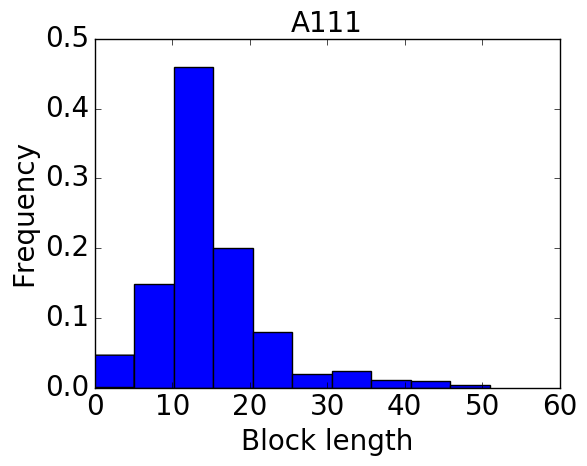

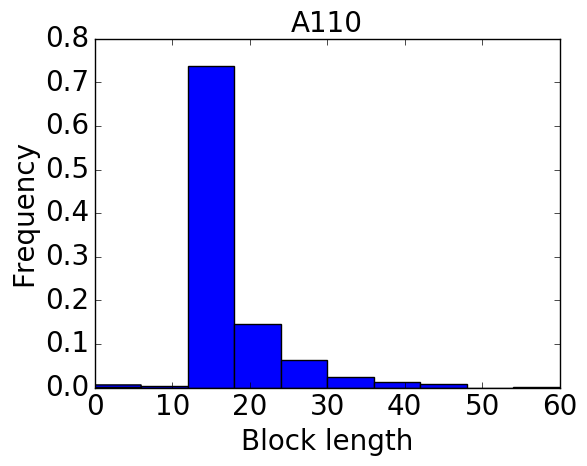

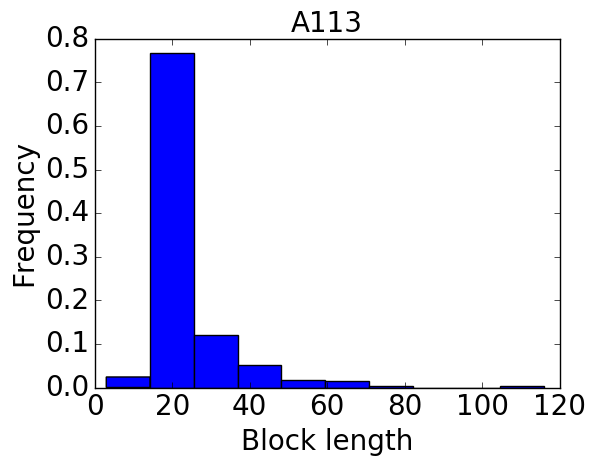

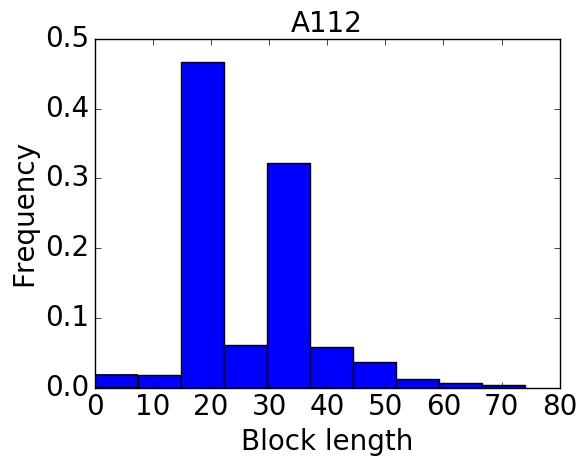

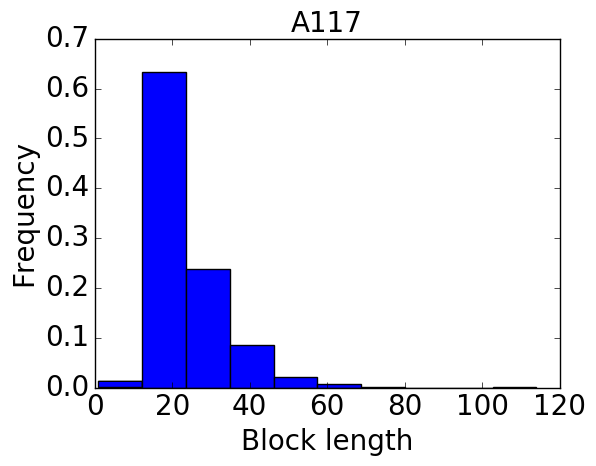

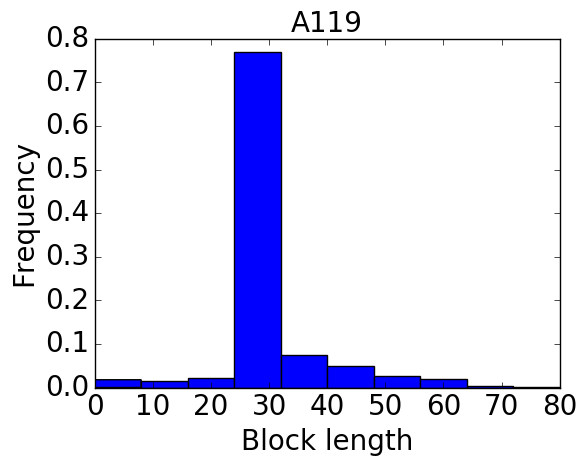

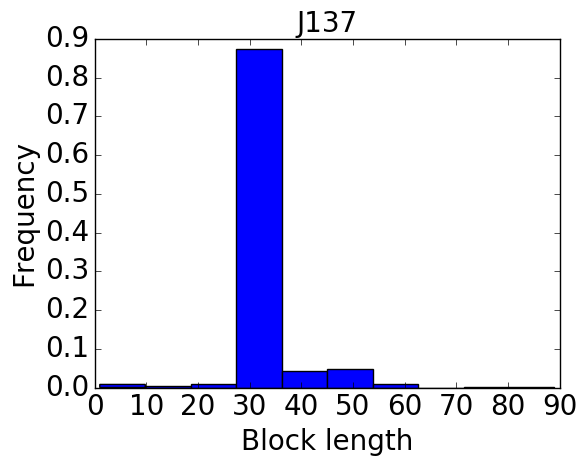

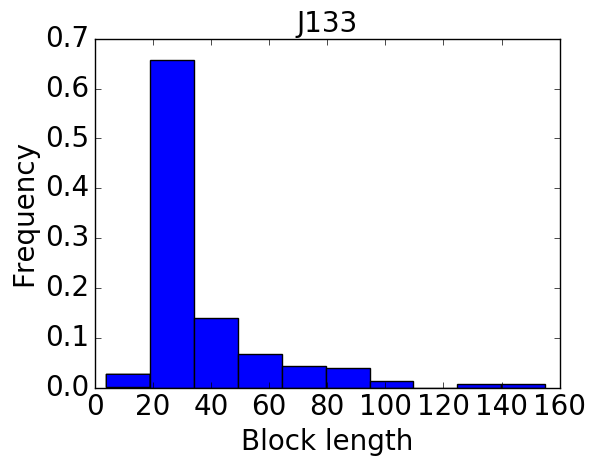

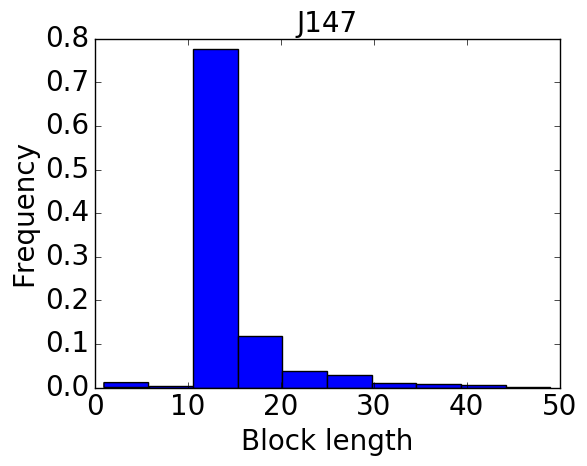

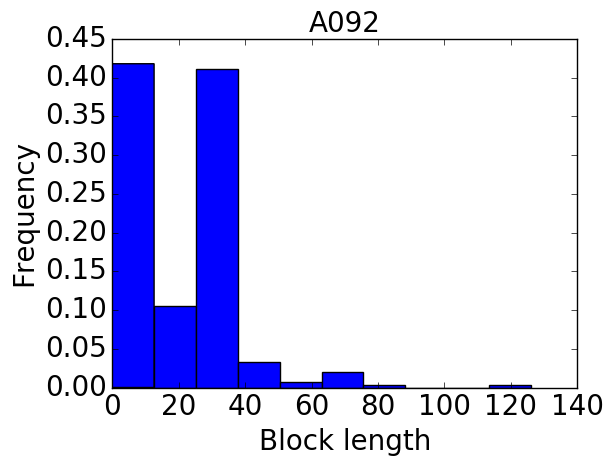

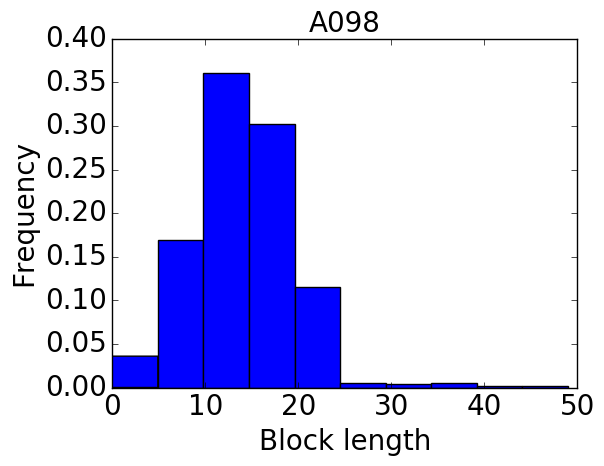

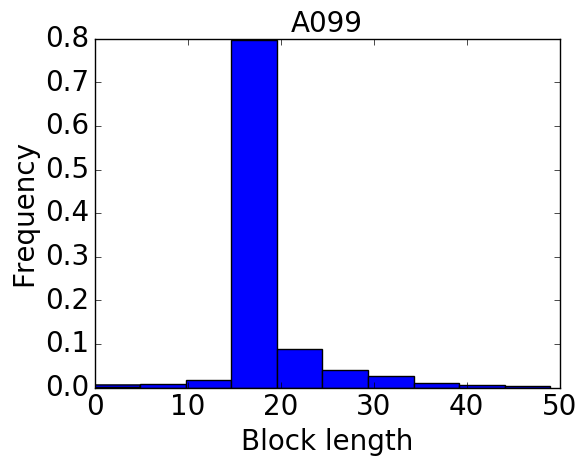

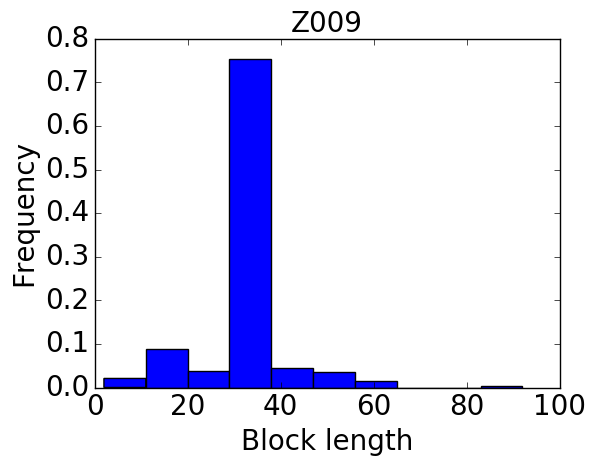

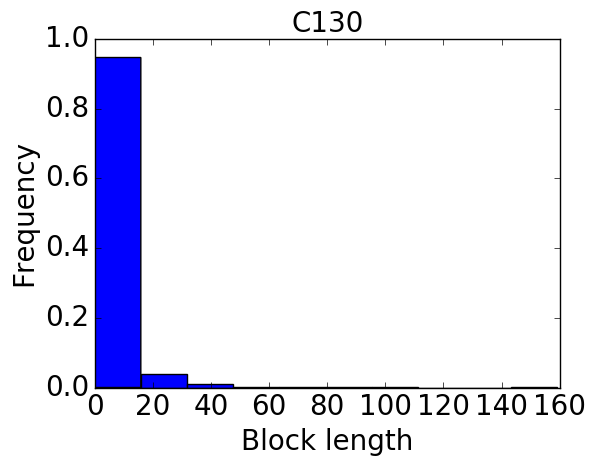

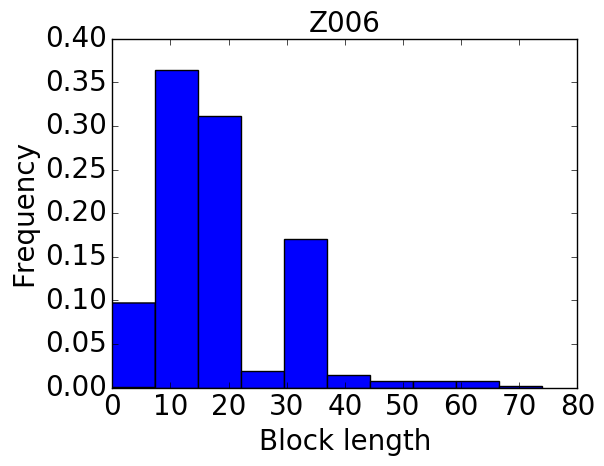

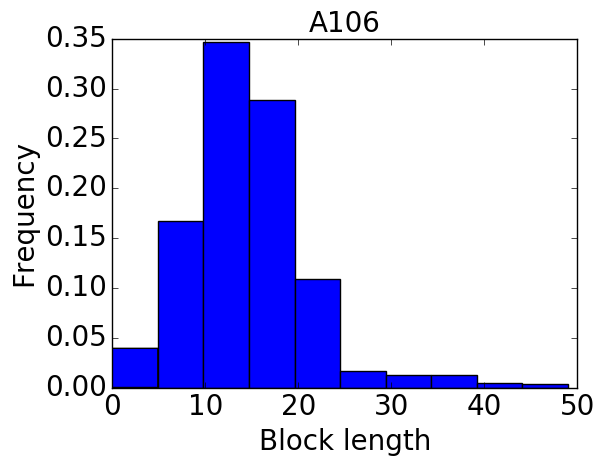

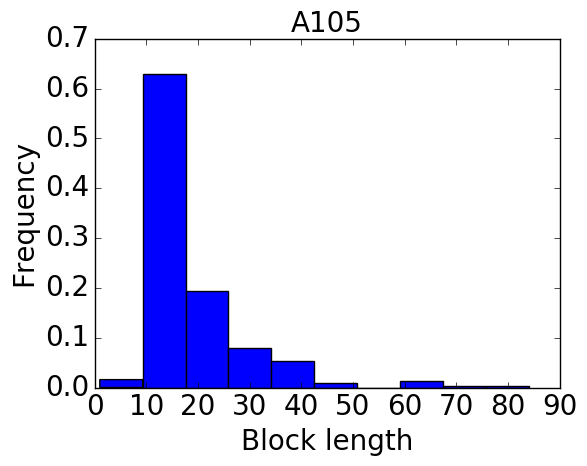

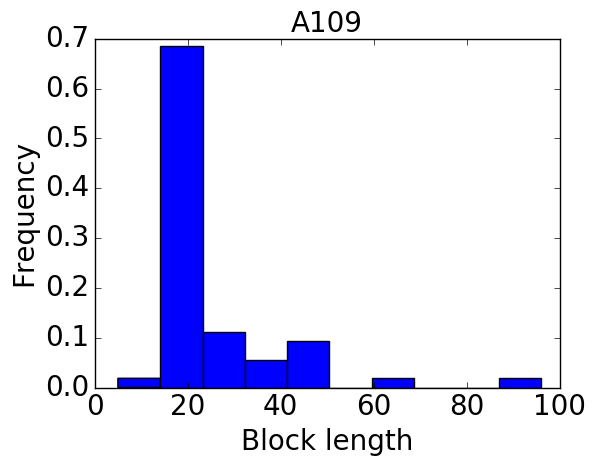

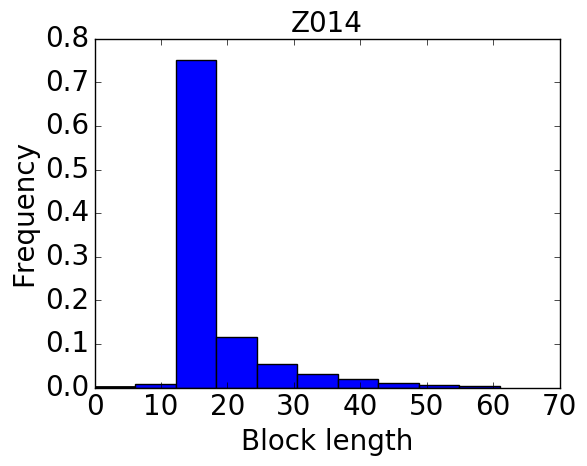

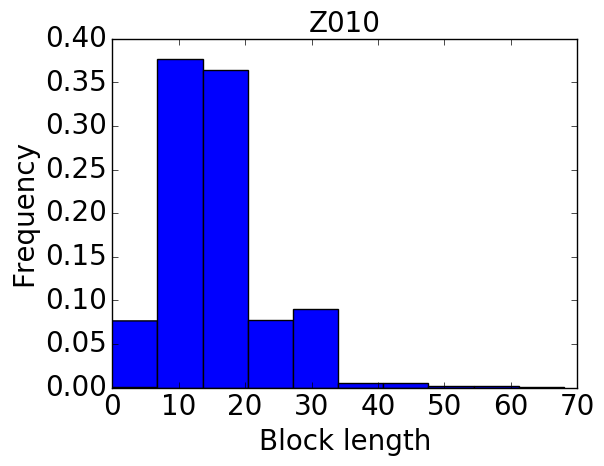

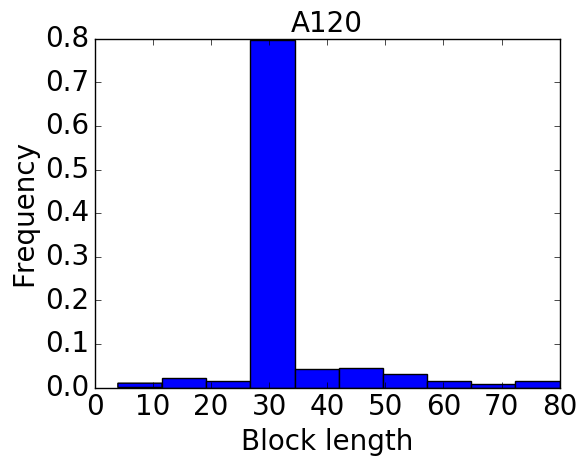

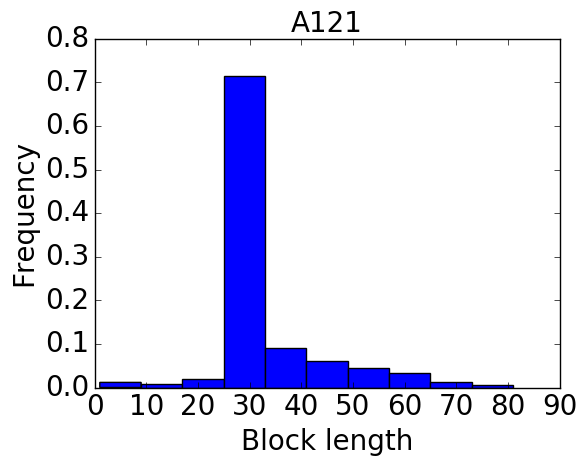

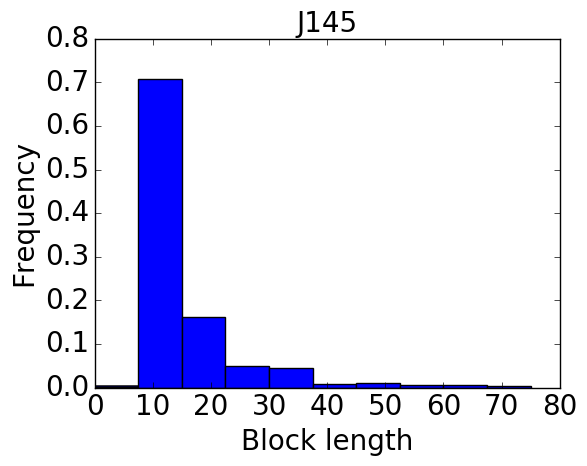

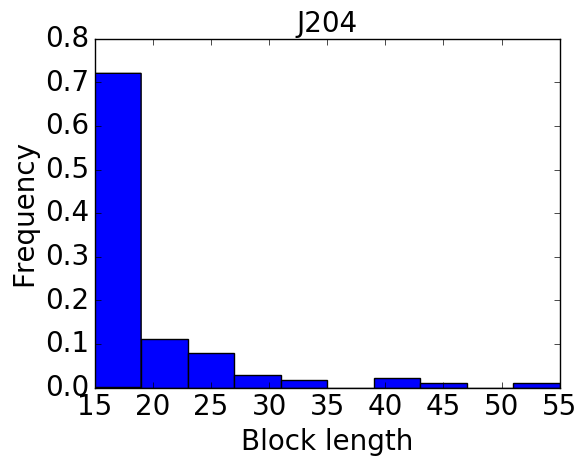

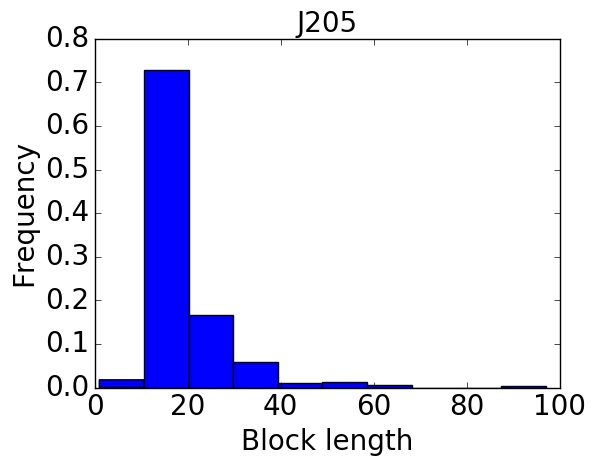

In [12]:
for ratname, block in block_lengths.iteritems():
    plt.figure()
    plt.hist(block,bins = 10, weights=np.zeros_like(block) + 1. / block.size)
    plt.title(ratname)
    plt.xlabel('Block length')
    plt.ylabel('Frequency')
    plt.show()

Include the following rats
A111
A110
A113
A112
A117
A119
J137
J133
J147
A092
A098
Z009
C130
Z006
A099
A106
A105
A109
Z014
Z010
A120
A121
J145
J204
J205


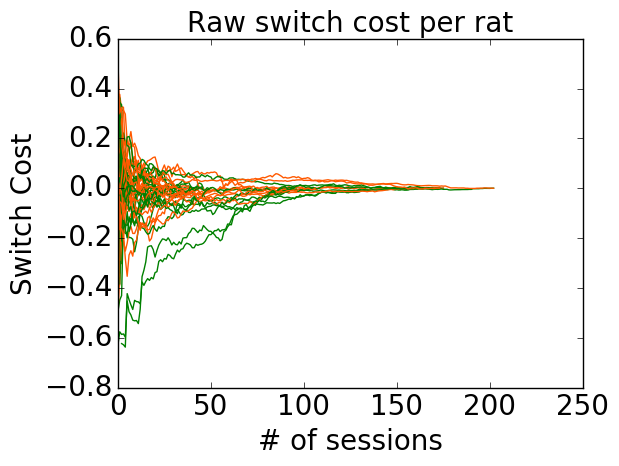

In [16]:
plt.figure()
print "Include the following rats"
green = "green"
orange = (1,0.35,0)
for ratname, rat in rats.iteritems():
    print ratname
    plt.plot(rat.pro_switch_cost - rat.pro_switch_cost[-1], color = green)
    plt.plot(rat.anti_switch_cost - rat.anti_switch_cost[-1], color = orange)
plt.xlabel('# of sessions')
plt.ylabel('Switch Cost')
plt.title('Raw switch cost per rat')
plt.show()

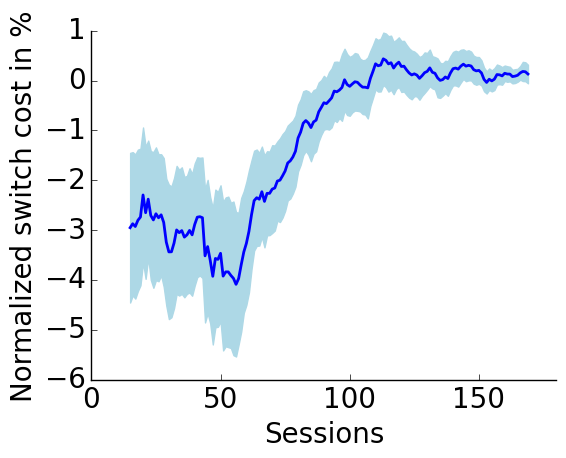

In [14]:
switch_cost_vs_time(rats, filename="figures/realRatSwitchCostvsTime.pdf")

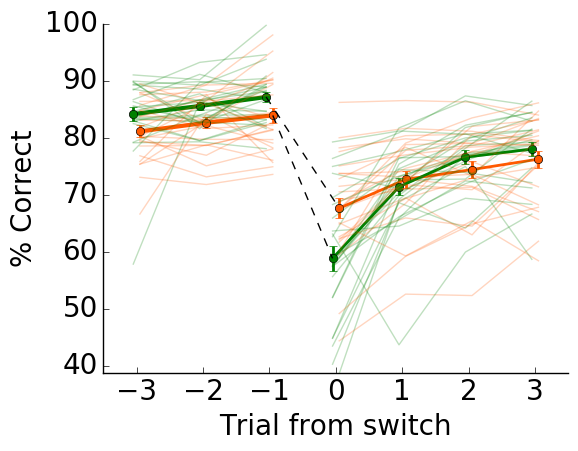

In [15]:
p2a, a2p = figure_3d_matrix(rats = rats, trial_window = 3)
draw_3d(p2a_matrix = p2a, a2p_matrix = a2p, fixed_size = False, trial_window = 3, filename="figures/realRat3D.pdf")